# Tutorial 1.4. Introduction to Statistical Quantities in Wind Engineering 
## Part 2: Extreme Value analysis

### Description: Tools for extreme values statistics are addressed with computations demonstrated for the generated signal in Part 1. Some additional exercises are proposed for individual studies.

#### Students are advised to complete the proposed excercises

#### Project: Structural Wind Engineering WS 20-21 Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek, A. Kodakkal        
Author : anoop.kodakkal@tum.de, mate.pentek@tum.de

Created on:  30.11.2015

Last update: 28.10.2020

Reference: G. Coles, Stuart. (2001). An introduction to statistical modeling of extreme values. Springer. 10.1007/978-1-4471-3675-0. 

##### Contents:

 1. Extreme Value Statistics 
 2. Block Maxima (BM)
 3. Peak Over Threshold (POT)
 4. Generalized Extreme Values (GEV)

In [1]:
# import python modules
import numpy as np
import scipy
from matplotlib import pyplot as plt

# import own modules
import custom_utilities as c_utils

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [2]:
# start time
start_time = 0.0
# end time
end_time = 10.0
# steps 
n_steps = 10000
# time step
delta_time = end_time / (n_steps-1)
# time series
# generate grid size vector (array) 1D
time_series = np.arange(start_time, end_time + delta_time, delta_time)

#### Generating signals in time domain (from herein referred to as a certain series (of values)).

#####  Three signals are created. 
1. A Harmonic (cosine) signal with given amplitude and frequency
2. A constant signal with given amplitude
3. A random signal with specified distribution and given properties

######  Random signal with specified distribution and given properties

In [3]:
# random signal 
# assuming nomarl distribution
# with given mean m = 0 and standard deviation std = 0.25
rand_m = 0.0
rand_std = 0.25
# series of the random
rand_series = np.random.normal(rand_m, rand_std, len(time_series))

## 1 Extreme value statistics

####  Two methods for extreme value analysis of (time) series are presented: Block Maxima (BM) and Peak Over Threshold (POT). Recall from the lecture the basic definitions and differences between these two parameters. 

The extreme value statistics of the generated superimposed signal generated earlier will be computed in this section. 

In [4]:
# here give the value for given_series
# as you have 4 series at hand already generated, you could
# choose one of const_series, cos_series, rand_series, superposed_series
given_series = rand_series

### Block Maxima (BM)

Recall from the lecture the basics of block maxima. A window size is chosen in computation of BM. The signal will be divided into the given window size. the extrema is extracted at each of the window. The mean, std and other statistics will be computed for the extrema.

In [5]:
block_size = np.round(len(given_series)/20) #  /20 -> 5% parent size for around
# 0.2% from parent distribution to be in tails 
[bm_index, bm_extreme_values] = c_utils.get_bm(given_series, block_size)
[bm_pdf_x, bm_pdf_y] = c_utils.get_pdf(bm_extreme_values)

Here the block size is chosen in such a way that each block will be 5% of the complete signal.

##### Tip: Have a look at the get_bm function in the "custom_utilities.py"  for details 

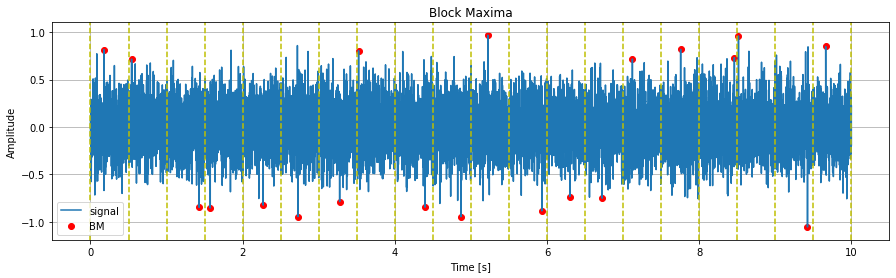

In [6]:
# plotting the initial time series and selected signal series - as a line plot
plt.figure(num=14, figsize=(15, 4))
plt.plot(time_series, given_series, label  ='signal')

# plotting the extracted bm - as a scatter plot with round red markers
plt.scatter(time_series[bm_index], given_series[bm_index], marker = 'o', color = 'r', label='BM')
plt.ylabel('Amplitude')
plt.title('Block Maxima')
plt.xlabel('Time [s]')

# add a vertical yellow dashed line to mark the separation between blocks used for extraction
for idx in np.arange(len(bm_index)):
    plt.axvline(x=time_series[np.int(block_size * idx)], color='y', linestyle='--')
plt.axvline(x=time_series[-1], color='y', linestyle='--')

plt.legend()
plt.grid(True)

__Note:__ Deciding the block size  in computation of BM can be critical. If the size of blocks is too big (resulting in very few blocks - too few extracted maxima), it may lead to large variance. If the block size is too small (resulting in too many blocks - too many extracted maxima) this may lead to large bias. The block size is decided as a trade off between the bias and the variance.   

### The Generalized Extreme Value distribution (GEV) 

The generalized extreme value (GEV) distribution function is a best fit to block maxima of data. Recall the details of the [extreme value distributions (GEV)](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution). The scipy implementation of [GEV](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genextreme.html) is used.


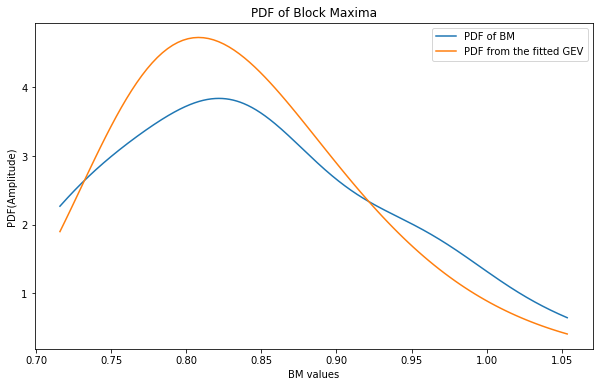

In [7]:
# importing additional necessary modules
from scipy.stats import genextreme as gev

# getting the fitting parameters shape, location and scale for the bm_extreme_values based upon a certain GEV fitting
bm_shape, bm_loc, bm_scale = gev.fit(bm_extreme_values)

bm_pdf_x2 = np.linspace(np.min(bm_extreme_values), np.max(bm_extreme_values), 100)
bm_pdf_y2 = gev.pdf(bm_pdf_x2, bm_shape, bm_loc, bm_scale)

plt.figure(num=15, figsize=(10, 6))

# PDF calculated using the get_pdf from custom_function_utilities
plt.plot(bm_pdf_x, bm_pdf_y, label = 'PDF of BM')
# PDF generated as a fitted curve using generalized extreme distribution
plt.plot(bm_pdf_x2, bm_pdf_y2, label = 'PDF from the fitted GEV')
plt.xlabel('BM values')
plt.ylabel('PDF(Amplitude)')
plt.title('PDF of Block Maxima')
plt.legend()

plt.show()

__Note:__ What do the parameters of GEV distribution indicate? How to classify the given extreme to be Gumbel (type I GEV), Frêchet (type II GEV) or Weibull (type III) distribution based on these parameters? Discuss

### Peak Over Threshold (POT)

Recall from the lecture the basics of peak over threshold. Every value exceeding this predefined threshold is considered an extrema. The threshold has to be decided in the beginning of the analysis, its choice is usually a function of the mean and the standard deviation of the signal.

In [8]:
series_m = np.mean(given_series)
series_std = np.std(given_series)

threshold_param = 2.5
threshold_value = series_m + threshold_param * series_std # for around 0.25% from parent 

# distribution to be in tails
# here end_time means values extracted after the whole given_series is available
[pot_endtime_index, pot_endtime_extreme_values] = c_utils.get_pot(given_series, threshold_value)
[pot_endtime_pdf_x, pot_endtime_pdf_y] = c_utils.get_pdf(pot_endtime_extreme_values)

print("POT: Threshold value: ", threshold_value)

POT: Threshold value:  0.625234033631648


Here, the threshold is set as mean plus 3 times standard deviation. For a normal distributed random variable this interval  $\mu \pm \sigma$ is found to have 99.75% density inside. 

##### Tip: Have a look at the get_pot function in the "custom_utilities.py"  for details 

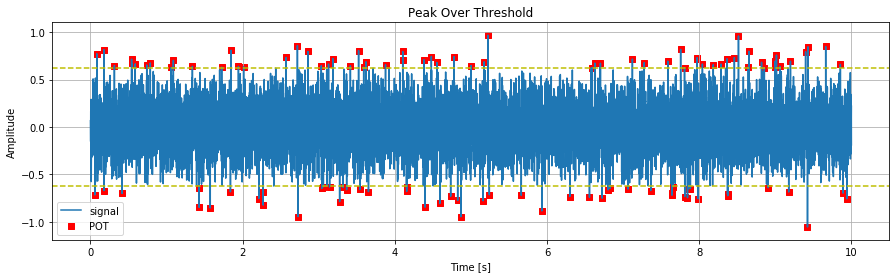

In [9]:
plt.figure(num=16, figsize=(15, 4))
# plotting the initial time series and selected signal series - as a line plot
# for this case the whole series is available
# it represents a signal being made available at the end of a mearsuremen or simulation
plt.plot(time_series, given_series, label = 'signal')

# plotting the extracted pot - as a scatter plot with round red markers
plt.scatter(time_series[pot_endtime_index], given_series[pot_endtime_index], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold')

# add a horizontal yellow dashed line to mark the the two treshold (upper and lower) used for extraction
plt.axhline(y=threshold_value, color='y', linestyle='--')
plt.axhline(y=-threshold_value, color='y', linestyle='--')

plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

### Runtime evaluation of POT

In many situations the whole data is not available in the begining of the analysis. The POT need to be evaluated on the fly. 

The mean and standard deviation used for defining the threshold criteria are also updated as new data becomes available. Here, the runtime behavior is replicated by considering the new values as soon as these become available.    

##### Tip: Have a look at the get_pot_runtime function in the "custom_utilities.py"  for details 

In [10]:
[res_m, res_rms, res_std, res_med, res_skew,
 res_thres, pot_runtime_index, pot_runtime_extreme_values] = \
                                c_utils.get_pot_runtime(given_series, threshold_param)
[pot_runtime_pdf_x, pot_runtime_pdf_y] = c_utils.get_pdf(pot_runtime_extreme_values)

/mnt/473082113A63A83C/02_statik_work/SWELecture/Ex01WindClimateABL/custom_utilities.py:224: RuntimeWarning: divide by zero encountered in double_scalars
  standarddev = np.sqrt((part1 - 2* meannew * part2 + meannew*meannew* i)/(i-1))


Elapsed time for get_pot_runtime function evaluation:  6.034533538999995 s



##### Let us plot the run-time statistical quantities and look how they evolve with time

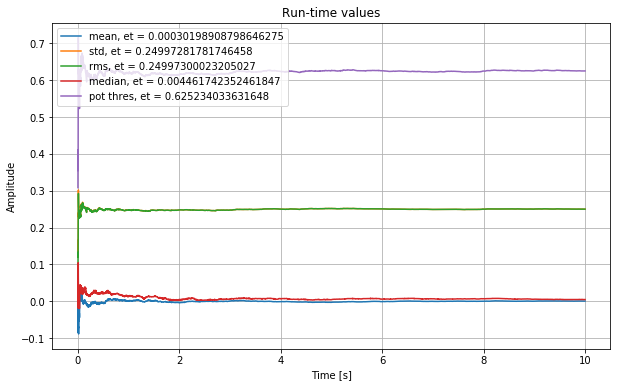

In [11]:
plt.figure(num=17, figsize=(10, 6))
plt.plot(time_series, res_m,
         time_series, res_std,
         time_series, res_rms,
         time_series, res_med,
         time_series, res_thres)
plt.legend(['mean, et = '+ str(np.mean(given_series)),
            'std, et = ' + str(np.std(given_series)),
            'rms, et = ' + str(np.sqrt(np.mean(np.square(given_series)))),
            'median, et = '+ str(np.median(given_series)),
            'pot thres, et = '+ str(threshold_value)])
plt.ylabel('Amplitude')
plt.title('Run-time values')
plt.xlabel('Time [s]')
plt.grid(True)

##### Let us plot the run-time evaluation of POT

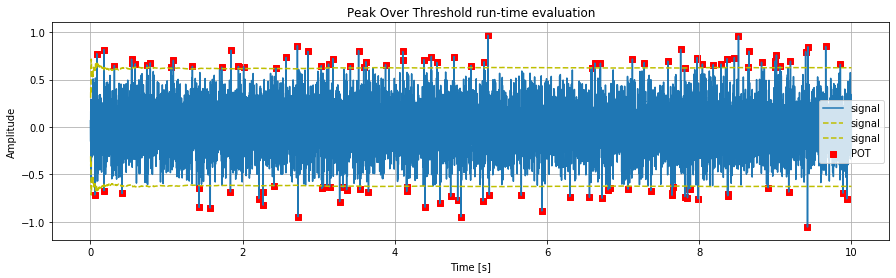

In [12]:
plt.figure(num=18, figsize=(15, 4))
# plotting the initial time series and selected signal series - as a line plot
# for this case the whole series is not available, but it is being made available one time step at a time
# it represents a signal being made available in run-time
plt.plot(time_series, given_series, label = 'signal')

# plotting the extracted pot - as a scatter plot with round red markers
plt.scatter(time_series[pot_runtime_index], given_series[pot_runtime_index], marker ='s', color = 'r', label = 'POT')
plt.ylabel('Amplitude')
plt.title('Peak Over Threshold run-time evaluation')

# add a horizontal yellow dashed line to mark the the two trehsholds (upper and lower) used for extraction
# note that these are not totally straight lines from the beginning until the end, but vary slightly in time
plt.plot(time_series, res_m + threshold_param * res_std, label = 'signal', color='y', linestyle='--')
plt.plot(time_series, -res_m - threshold_param * res_std, label = 'signal', color='y', linestyle='--')

plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)

### The Generalized Pareto distribution (GP) 

The generalized Pareto (GP) distribution function is a best fit to peak over threshold data. Recall the details of the [generalized Pareto (GP) distribution](https://en.wikipedia.org/wiki/Generalized_Pareto_distribution). The scipy implementation of [GP](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genpareto.html) can be used.


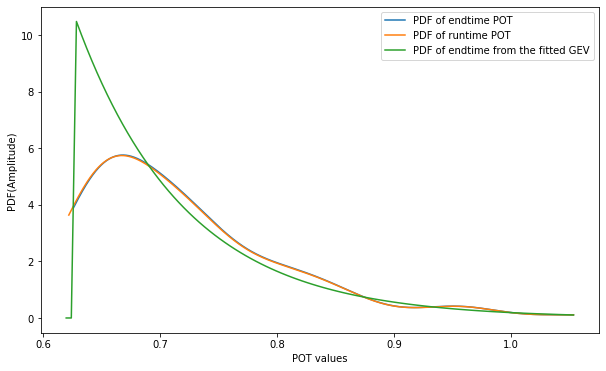

In [13]:
# importing additional necessary modules
from scipy.stats import genpareto as gp

# getting the fitting parameters shape, location and scale for the bm_extreme_values based upon a certain GEV fitting
pot_shape, pot_loc, pot_scale = gp.fit(pot_endtime_extreme_values, 0 , loc = threshold_value , scale = 1)

pot_endtime_pdf_x2 = np.linspace(0.99 * np.min(pot_endtime_extreme_values), np.max(pot_endtime_extreme_values), 100)
pot_endtime_pdf_y2 = gp.pdf(pot_endtime_pdf_x2, pot_shape, pot_loc, pot_scale)

plt.figure(num=19, figsize=(10, 6))

# PDF calculated using the get_pdf from custom_function_utilities
# for endtime and runtime
plt.plot(pot_endtime_pdf_x, pot_endtime_pdf_y, label = 'PDF of endtime POT')
plt.plot(pot_runtime_pdf_x, pot_runtime_pdf_y, label = 'PDF of runtime POT')

# PDF generated as a fitted curve using generalized extreme distribution
plt.plot(pot_endtime_pdf_x2, pot_endtime_pdf_y2, label = 'PDF of endtime from the fitted GEV')

plt.xlabel('POT values')
plt.ylabel('PDF(Amplitude)')
plt.legend()
plt.show()

### Excercise 1: Observe the changes with varying the number of blocks and threshold value

Change *block_size* and *threshold_param*. Observe the difference,  comment and discuss. 

## Check Point 1: Discussion

#### Discuss among groups the observations and outcomes regarding extreme value statistics.

### Assignment: Compute the extreme value statistics for the given signal

Two data sets 'given_data1.dat' and 'given_data2.dat' are provided which contains the time domain data of bending moment. Compute the statistical quantities of the given data. Plot the corresponding functions. Compute the BM and POT for these given data sets. Make necessary changes and adaptation in block 4 from the follwing snippet in block 14. (use 'Ctrl' + '/' to uncomment multiple lines)

In [14]:
# file_name = 'given_data1.dat'  # has 5350 values for each column
# time_series = np.loadtxt(file_name, skiprows=0, usecols = (0,)) # in [s]
# bending_moment_series = np.loadtxt(file_name, skiprows=0, usecols = (1,)) # in [kNm]

# file_name = 'given_data2.dat' # has 53491 values for each column
# time_series = (np.loadtxt(file_name, skiprows=0, usecols = (0,))-1000)/100  # shift 1000 [cs] then divide by 100 to get [s]
# bending_moment_series = np.loadtxt(file_name, skiprows=0, usecols = (1,))/1000 # to get [kNm] from [Nm] divide by 1000

# # assign the bending moment series to the given series
# given_series = bending_moment_series